In [12]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)
library(vegan)
library(corrplot)

In [13]:
#install.packages("corrplot")

In [22]:
# Importing the dataset
ps = import_biom("../OTU_table/feature-table-metaD-tax.biom",parseFunction=parse_taxonomy_greengenes, "../OTU_table/Trees/fulltree.tre")


Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

In [15]:
# Setting various parameters as combined values
sample_data(ps)$pH = as.numeric(sample_data(ps)$pH)
sample_data(ps)$Total_C_pct = as.numeric(sample_data(ps)$TC_pct)
sample_data(ps)$Total_N_pct = as.numeric(sample_data(ps)$Total_N_pct)
sample_data(ps)$Total_S_pct = as.numeric(sample_data(ps)$Total_S_pct)
sample_data(ps)$Burn_Severity_Index= as.numeric(sample_data(ps)$Burn_Severity_Index)
sample_data(ps)$CBI= as.numeric(sample_data(ps)$CBI)
sample_data(ps)$RBR= as.numeric(sample_data(ps)$RBR)
sample_data(ps)$CFSI= as.numeric(sample_data(ps)$CFSI)
sample_data(ps)$Mean_Duff_Depth_cm = as.numeric(sample_data(ps)$Mean_Duff_Depth_cm)
sample_data(ps)$Understory_CBI= as.numeric(sample_data(ps)$Understory_CBI)
sample_data(ps)$Overstory_CBI= as.numeric(sample_data(ps)$Overstory_CBI)
sample_data(ps)$Overstory_CBI= as.numeric(sample_data(ps)$Overstory_CBI)
sample_data(ps)$Dead_Trees= as.numeric(sample_data(ps)$Dead_Trees)
sample_data(ps)$TotalSeqs=sample_sums(ps)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [16]:
colnames(sample_data(ps))

[1] "Al_mg_kg"                   "Barcodes"                  
 [3] "Burn_Severity_Index"        "Burned_Unburned"           
 [5] "CBI"                        "CEC_cmol_kg"               
 [7] "CFSI"                       "Ca_mg_kg"                  
 [9] "Clay_pct"                   "Community"                 
[11] "Cu_mg_kg"                   "Dead_Trees"                
[13] "EC_mS_cm"                   "Ecosite"                   
[15] "Fe_mg_kg"                   "Fire_ID"                   
[17] "Forest"                     "Fwd_Primer_Barcode"        
[19] "Interval"                   "K_mg_kg"                   
[21] "Land_Class"                 "Land_Class_Unburned"       
[23] "Live_Trees"                 "Mean_Duff_Depth_cm"        
[25] "Mg_mg_kg"                   "Mn_mg_kg"                  
[27] "Mo_mg_kg"                   "Moisture"                  
[29] "Moisture_Regime"            "Na_mg_kg"                  
[31] "Nutrient"                   "O_Depth_cm"                
[33] "Org_or_Min"                 "Overstory_CBI"             
[35] "P_mg_kg"                    "Pct_Exposed_Mineral"       
[37] "Plains"                     "Project_ID"                
[39] "RBR"                        "Replicate"                 
[41] "Rev_Primer_Barcode"         "Revcomp_Rev_Primer_Barcode"
[43] "S_mg_kg"                    "Sample_ID"                 
[45] "Sample_Name"                "Sand_pct"                  
[47] "Severity_Class"             "Silt_pct"                  
[49] "Site_ID"                    "TC_pct"                    
[51] "TIC_ash_pct"                "TOC_HCL_cruc_pct"          
[53] "TOC_LOI_pct"                "Total_N_pct"               
[55] "Total_S_pct"                "Understory_CBI"            
[57] "Veg_Comm"                   "Zn_mg_kg"                  
[59] "bui"                        "dc"                        
[61] "dmc"                        "ffmc"                      
[63] "fwi"                        "isi"                       
[65] "nTrees"                     "pH"                        
[67] "prec"                       "rh"                        
[69] "temp"                       "ws"                        
[71] "Total_C_pct"                "TotalSeqs"

In [21]:
head(sample_data(ps))

,Al_mg_kg,Barcodes,Burn_Severity_Index,Burned_Unburned,CBI,CEC_cmol_kg,CFSI,Ca_mg_kg,Clay_pct,Community,⋯,fwi,isi,nTrees,pH,prec,rh,temp,ws,Total_C_pct,TotalSeqs
15S-NT-19O-1,436.7240,TGCTCGTAGATCGTGT,3.5125,Burned,2.23,NA,3.075,48174.3000,NA,Lt/river alder-Labraor tea/sedge/golden moss,⋯,42.66896886,13.12020458,32,7.62,0.000139099,35.44057915,24.91223419,17.22008579,43.3,8636
15S-NT-19O-2,436.7240,TAGTCTCCTGCGTACG,3.5125,Burned,2.23,NA,3.075,48174.3000,NA,Lt/river alder-Labraor tea/sedge/golden moss,⋯,42.66896886,13.12020458,32,7.62,0.000139099,35.44057915,24.91223419,17.22008579,43.3,25068
15S-NT-20O-A-1,#N/A,TAGCAGCTGACACCGT,2.3750,Burned,1.05,#N/A,1.000,#N/A,#N/A,willow/golden moss,⋯,34.47629061,9.549219773,8,NA,0.0000345,33.72715235,28.36350358,11.95882987,NA,2878
15S-NT-20O-A-2,#N/A,AACGCTGAGTCAGATA,2.3750,Burned,1.05,#N/A,1.000,#N/A,#N/A,willow/golden moss,⋯,34.47629061,9.549219773,8,NA,0.0000345,33.72715235,28.36350358,11.95882987,NA,6301
15S-NT-20O-B-1,#N/A,CGAGCGACTAGTGTAG,2.3750,Burned,1.05,#N/A,1.000,#N/A,#N/A,willow/golden moss,⋯,34.47629061,9.549219773,8,NA,0.0000345,33.72715235,28.36350358,11.95882987,NA,6990
15S-NT-20O-B-2,#N/A,CGAGCGACATCGTACG,2.3750,Burned,1.05,#N/A,1.000,#N/A,#N/A,willow/golden moss,⋯,34.47629061,9.549219773,8,NA,0.0000345,33.72715235,28.36350358,11.95882987,NA,8436


In [23]:
# Pulling out samples from this project only
ps.wb = prune_samples(sample_data(ps)$Project_ID=="WB15", ps)
ps.wb.org = prune_samples(sample_data(ps.wb)$Org_or_Min %in% c("O"), ps.wb)
ps.wb.min = prune_samples(sample_data(ps.wb)$Org_or_Min %in% c("M"), ps.wb)
ps.wb.org.merged = merge_samples(ps.wb.org, "Site_ID")
ps.wb.min.merged = merge_samples(ps.wb.min, "Site_ID")
ps.wb.org.merged.norm = transform_sample_counts(ps.wb.org.merged, function(x) x / sum(x) )
ps.wb.min.merged.norm = transform_sample_counts(ps.wb.min.merged, function(x) x / sum(x) )

Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMeth

In [24]:
Dist.org.mb = as.matrix(distance(ps.wb.org.merged, method="bray", type="samples"))
Dist.min.mb = as.matrix(distance(ps.wb.min.merged, method="bray", type="samples"))

In [25]:
Dist.veg = read.csv("../../../data/Veg_properties/WBNPNWT_Vegetation_Braydistance_2015.csv")
row.names(Dist.veg)=Dist.veg$X
Dist.veg=Dist.veg[,2:dim(Dist.veg)[2]]
colnames(Dist.veg)=row.names(Dist.veg)

In [26]:
OrgSamples = colnames(as.matrix(Dist.org.mb))[colnames(as.matrix(Dist.org.mb)) %in% colnames(as.matrix(Dist.veg))]
MinSamples = colnames(as.matrix(Dist.min.mb))[colnames(as.matrix(Dist.min.mb)) %in% colnames(as.matrix(Dist.veg))]

In [27]:
Dist.org.veg = Dist.veg[row.names(Dist.veg) %in% OrgSamples,colnames(Dist.veg) %in% OrgSamples]
Dist.min.veg = Dist.veg[row.names(Dist.veg) %in% MinSamples,colnames(Dist.veg) %in% MinSamples]
Dist.org.mb = Dist.org.mb[row.names(Dist.org.mb) %in% OrgSamples,colnames(Dist.org.mb) %in% OrgSamples]
Dist.min.mb = Dist.min.mb[row.names(Dist.min.mb) %in% MinSamples,colnames(Dist.min.mb) %in% MinSamples]

In [28]:
colnames(Dist.org.mb) == colnames(Dist.org.veg)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE

In [29]:
class(Dist.min.veg)

[1] "data.frame"

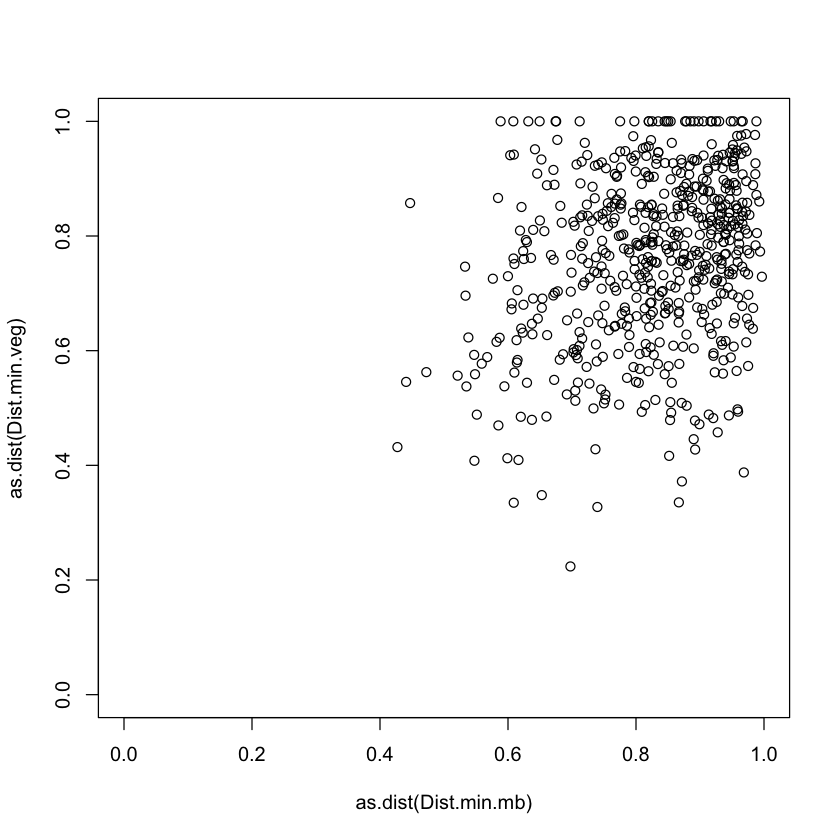

In [30]:
plot(as.dist(Dist.min.mb),as.dist(Dist.min.veg),xlim=c(0,1), ylim=c(0,1))
# colour by distance matrix of burn severity metrics
# colour by distnace matrix of soils

In [31]:
c = cor(Dist.org.mb,Dist.org.veg,method="pearson")

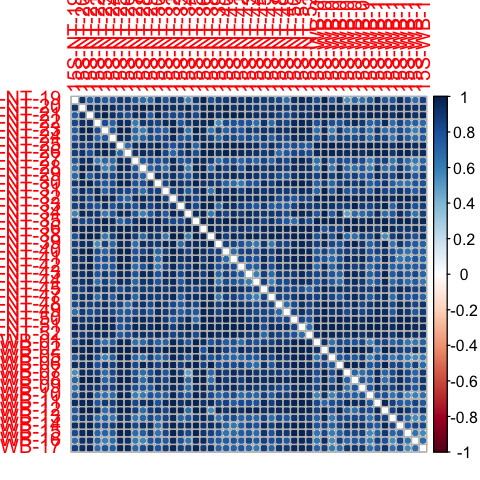

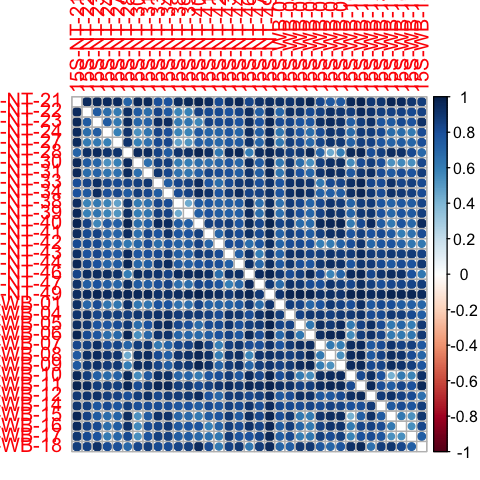

In [32]:
options(repr.plot.width=4, repr.plot.height=4)
corrplot(as.matrix(Dist.org.mb),method="circle")
corrplot(as.matrix(Dist.min.mb),method="circle")

In [33]:
# Making a matrix with one data entry for each site
SamDat = sample_data(ps)[!duplicated(sample_data(ps)$Site_ID),]
rownames(SamDat) = SamDat$Site_ID

In [37]:
df = data.frame(melt(as.matrix(Dist.org.veg)),melt(as.matrix(Dist.org.mb)))
#Generates a dataframe with each contrast and the dissimilarity for the plant comm and the mb comm
df = df[,c(1,2,3,6)]
colnames(df) = c("Site_ID_1","Site_ID_2","Mb_dist","Veg_dist")
#df$X1==df$X1.1 # making sure the contrasts are the same

# Need to add datasets for each site type, and then whether they are the same or not.
# Let's start with wetland vs. upland
for (i in df$Site_ID_1){
    df$Land_Class_1[df$Site_ID_1==i] = SamDat$Land_Class[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Land_Class_2[df$Site_ID_2==i] = SamDat$Land_Class[SamDat$Site_ID==i]
}
df$Land_Class = ifelse(df$Land_Class_1==df$Land_Class_2,df$Land_Class_1,"Different")

# Let's add Veg_Comm
for (i in df$Site_ID_1){
    df$Veg_Comm_1[df$Site_ID_1==i] = SamDat$Veg_Comm[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Veg_Comm_2[df$Site_ID_2==i] = SamDat$Veg_Comm[SamDat$Site_ID==i]
}
df$Veg_Comm = ifelse(df$Veg_Comm_1==df$Veg_Comm_2,df$Veg_Comm_1,"Different")

# Let's add Burned_Unburned
for (i in df$Site_ID_1){
    df$Burned_Unburned_1[df$Site_ID_1==i] = SamDat$Burned_Unburned[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Burned_Unburned_2[df$Site_ID_2==i] = SamDat$Burned_Unburned[SamDat$Site_ID==i]
}
df$Burned_Unburned = ifelse(df$Burned_Unburned_1==df$Burned_Unburned_2,df$Burned_Unburned_1,"Different")

# And let's add Burn_Severity_Index
for (i in df$Site_ID_1){
    df$Burn_Severity_Index_1[df$Site_ID_1==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$Burn_Severity_Index_2[df$Site_ID_2==i] = SamDat$Burn_Severity_Index[SamDat$Site_ID==i]
}
df$Burn_Severity_Index_1 = as.numeric(df$Burn_Severity_Index_1)
df$Burn_Severity_Index_2 = as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Diff = abs(as.numeric(df$Burn_Severity_Index_1) - as.numeric(df$Burn_Severity_Index_2))
df$Burn_Severity_Index_Mean = (as.numeric(df$Burn_Severity_Index_1) + as.numeric(df$Burn_Severity_Index_2))/2
df$Burn_Severity_Index_Ratio = as.numeric(df$Burn_Severity_Index_1) / as.numeric(df$Burn_Severity_Index_2)
df$Burn_Severity_Index_Class = ifelse(df$Burn_Severity_Index_1>mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2>mean(df$Burn_Severity_Index_1),"high",
                                      ifelse(df$Burn_Severity_Index_1<mean(df$Burn_Severity_Index_1) &
                                     df$Burn_Severity_Index_2<mean(df$Burn_Severity_Index_1),"low","mixed"))
df$Burn_Severity_Index_Class = ordered(df$Burn_Severity_Index_Class, levels = c("high", "mixed", "low"))

# And let's add CBI
for (i in df$Site_ID_1){
    df$CBI_1[df$Site_ID_1==i] = SamDat$CBI[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$CBI_2[df$Site_ID_2==i] = SamDat$CBI[SamDat$Site_ID==i]
}
df$CBI_Diff = abs(as.numeric(df$CBI_1) - as.numeric(df$CBI_2))
df$CBI_Mean = (as.numeric(df$CBI_1) + as.numeric(df$CBI_2))/2




# And why not pH?
for (i in df$Site_ID_1){
    df$pH_1[df$Site_ID_1==i] = SamDat$pH[SamDat$Site_ID==i]
}
for (i in df$Site_ID_2){
    df$pH_2[df$Site_ID_2==i] = SamDat$pH[SamDat$Site_ID==i]
}
df$pH_Diff = abs(as.numeric(df$pH_1) - as.numeric(df$pH_2))
df$pH_Mean = (as.numeric(df$pH_1) + as.numeric(df$pH_2))/2


#
head(df)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

Site_ID_1,Site_ID_2,Mb_dist,Veg_dist,Land_Class_1,Land_Class_2,Land_Class,Veg_Comm_1,Veg_Comm_2,Veg_Comm,⋯,Burn_Severity_Index_Ratio,Burn_Severity_Index_Class,CBI_1,CBI_2,CBI_Diff,CBI_Mean,pH_1,pH_2,pH_Diff,pH_Mean
15S-NT-19,15S-NT-19,0.0000000,0.0000000,Wetland,Wetland,Wetland,Treed Wetland,Treed Wetland,Treed Wetland,⋯,1.0000000,high,2.23,2.23,0.00,2.230,7.6200,7.6200,0.00,7.62
15S-NT-20,15S-NT-19,0.7032652,0.9159992,Wetland,Wetland,Wetland,Open Wetland,Treed Wetland,Different,⋯,0.6761566,mixed,1.05,2.23,1.18,1.640,#N/A,7.6200,NA,NA
15S-NT-21,15S-NT-19,0.6677345,0.7347040,Wetland,Wetland,Wetland,Open Wetland,Treed Wetland,Different,⋯,0.4377224,mixed,0.39,2.23,1.84,1.310,#N/A,7.6200,NA,NA
15S-NT-22,15S-NT-19,0.9649712,0.8397207,Upland,Wetland,Different,Jack Pine,Treed Wetland,Different,⋯,1.0049822,high,1.27,2.23,0.96,1.750,6.6600,7.6200,0.96,7.14
15S-NT-23,15S-NT-19,1.0000000,0.7444346,Upland,Wetland,Different,Jack Pine,Treed Wetland,Different,⋯,1.1010812,high,1.16,2.23,1.07,1.695,5.8000,7.6200,1.82,6.71
15S-NT-24,15S-NT-19,0.9657845,0.7854771,Upland,Wetland,Different,Mixedwood,Treed Wetland,Different,⋯,0.6028470,mixed,0.21,2.23,2.02,1.220,6.1400,7.6200,1.48,6.88


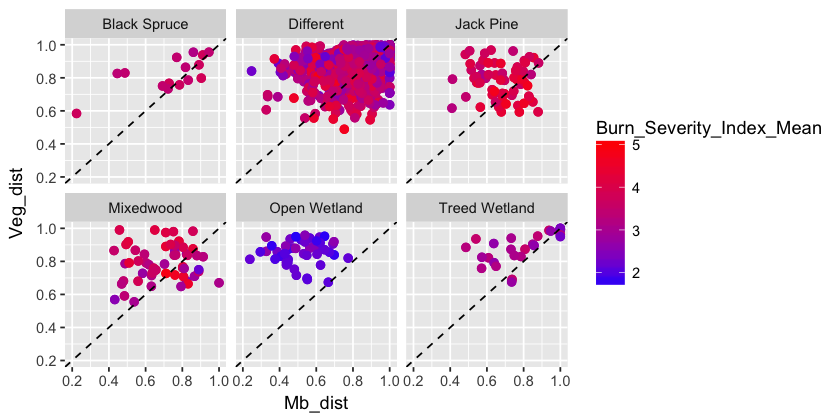

In [47]:
options(repr.plot.width=7, repr.plot.height=3.5)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0 , aes(y=Veg_dist, x=Mb_dist, color=Burn_Severity_Index_Mean))
p = p + geom_point(alpha=1, size=2) + scale_color_gradient(low="blue",high="red")
p = p + facet_wrap(~Veg_Comm) 
p = p + scale_x_continuous(limits = c(0.2,1))
p = p + scale_y_continuous(limits = c(0.2,1))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p

Warning message:
“Removed 273 rows containing missing values (geom_point).”

Warning message:
“Removed 273 rows containing missing values (geom_point).”

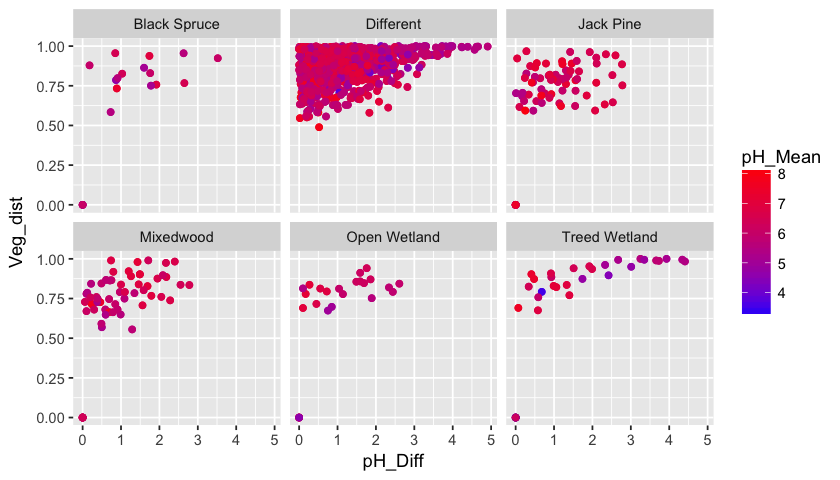

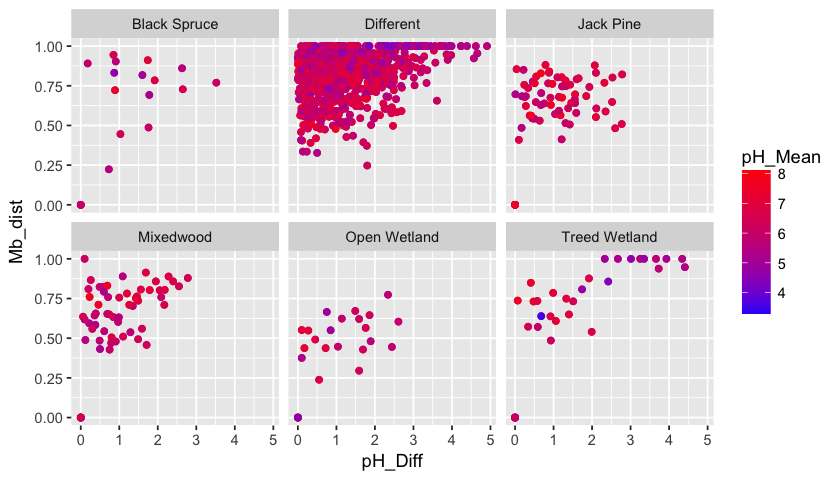

In [48]:
options(repr.plot.width=7, repr.plot.height=4)


p = ggplot(df,aes(color=pH_Mean, x=pH_Diff))
p = p + geom_point(aes(y=Veg_dist))
p = p + facet_wrap(~Veg_Comm) + scale_color_gradient(low="blue",high="red")
p

p = ggplot(df,aes(color=pH_Mean, x=pH_Diff))
p = p + geom_point(aes(y=Mb_dist))
p = p + facet_wrap(~Veg_Comm) + scale_color_gradient(low="blue",high="red")
p

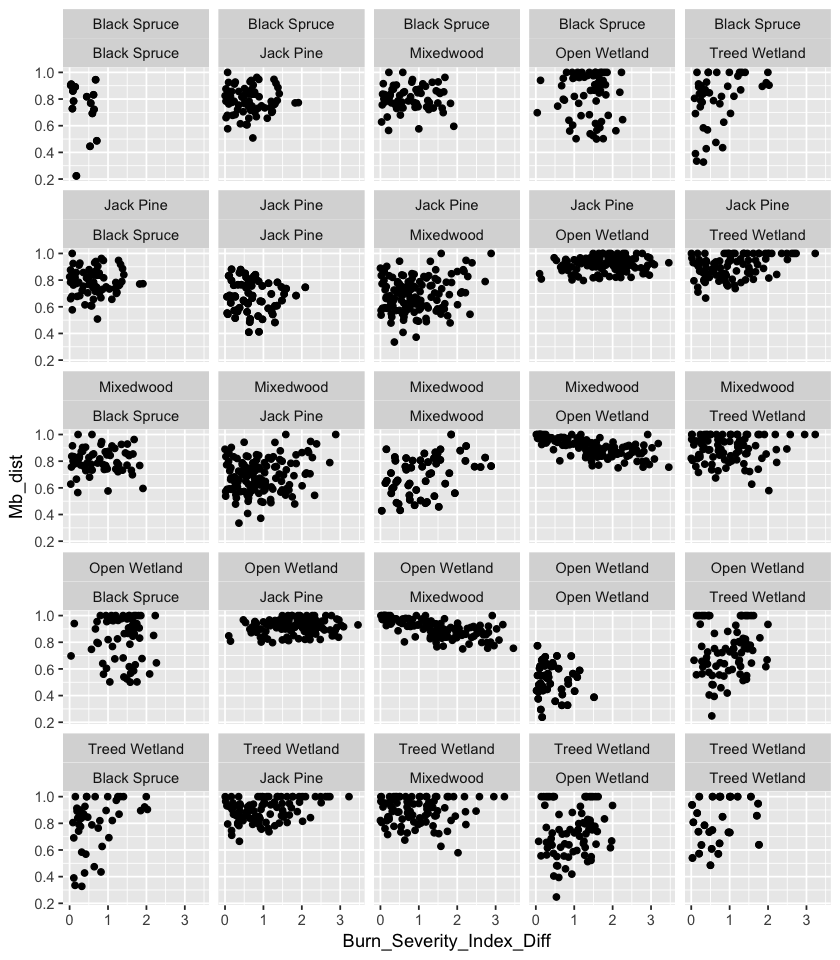

In [49]:
options(repr.plot.width=7, repr.plot.height=8)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0,aes(y=Mb_dist, x=Burn_Severity_Index_Diff))
p = p + geom_point()
p = p + facet_wrap(~Veg_Comm_1~Veg_Comm_2) + scale_color_gradient(low="blue",high="red")
p

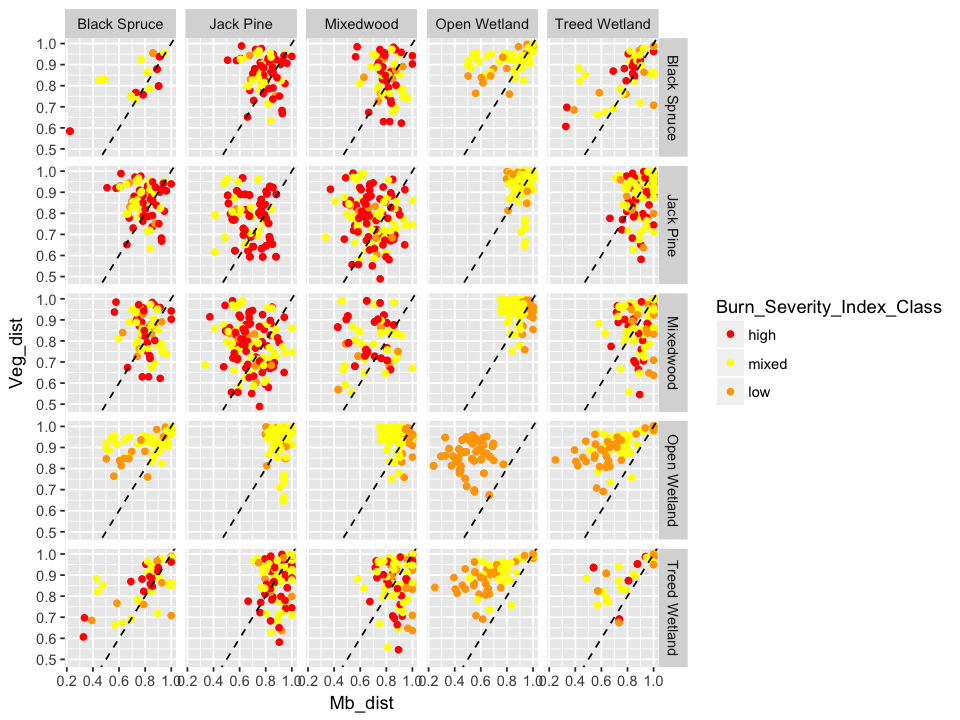

In [50]:
options(repr.plot.width=8, repr.plot.height=6)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0, aes(x = Mb_dist, y=Veg_dist, color=Burn_Severity_Index_Class))
p = p + geom_point() #+ scale_color_gradient(low="blue",high="red")
p = p + scale_color_manual(values=c("red","yellow","orange"))
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2)
p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2)
#p = p + scale_x_continuous(limits = c(1,3.5))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p

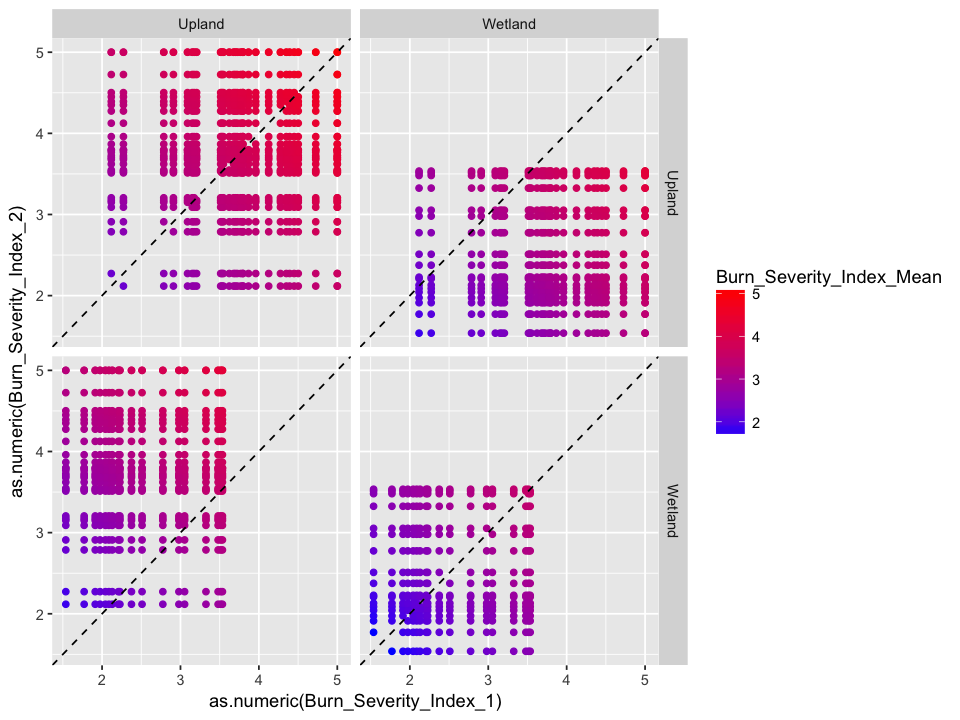

In [51]:
options(repr.plot.width=8, repr.plot.height=6)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0, aes(x = as.numeric(Burn_Severity_Index_1), y=as.numeric(Burn_Severity_Index_2), color=Burn_Severity_Index_Mean))
p = p + geom_point() + scale_color_gradient(low="blue",high="red")
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
p = p + facet_grid(~Land_Class_1~Land_Class_2) 
#p = p + scale_x_continuous(limits = c(1,3.5))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p



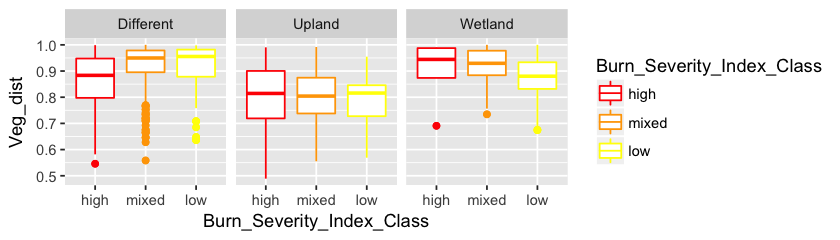

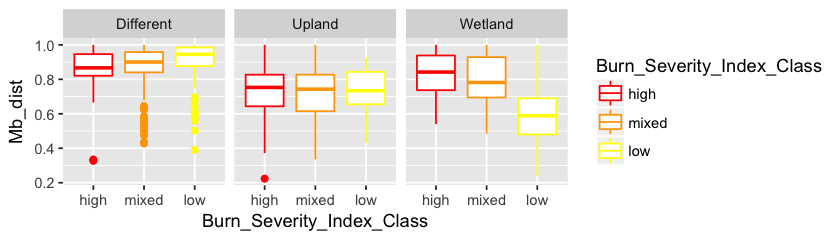

In [52]:
options(repr.plot.width=7, repr.plot.height=2)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0, aes(x = Burn_Severity_Index_Class, y=Veg_dist, color=Burn_Severity_Index_Class))
p = p + geom_boxplot() #+ scale_color_gradient(low="blue",high="red")
p = p + scale_color_manual(values=c("red","orange","yellow"))
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2)
#p = p + facet_wrap(~Veg_Comm)
p = p + facet_wrap(~Land_Class)
#p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2)
p

p = ggplot(df.no0, aes(x = Burn_Severity_Index_Class, y=Mb_dist, color=Burn_Severity_Index_Class))
p = p + geom_boxplot() #+ scale_color_gradient(low="blue",high="red")
p = p + scale_color_manual(values=c("red","orange","yellow"))
#p = p + facet_grid(~Site_ID_1*Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2)
#p = p + facet_wrap(~Veg_Comm)
p = p + facet_wrap(~Land_Class)
#p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2)
p

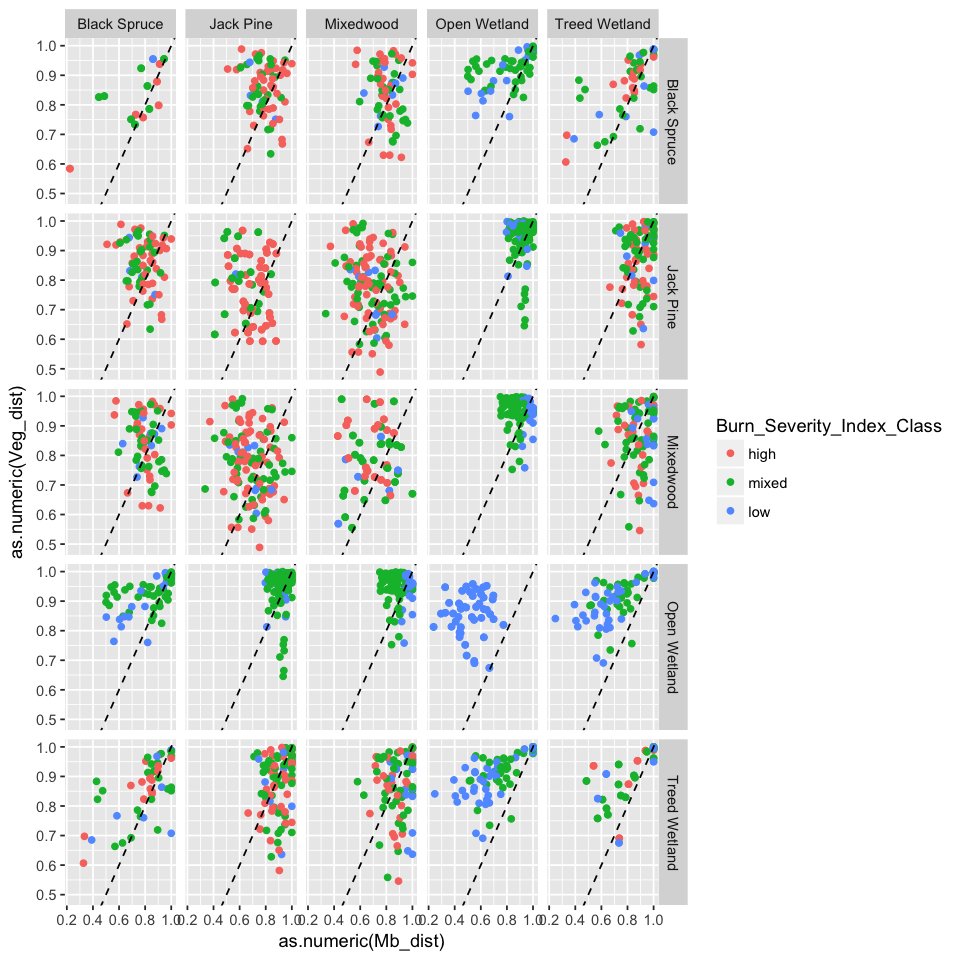

In [53]:
options(repr.plot.width=8, repr.plot.height=8)

df.no0 = df %>%
    filter(Site_ID_1 != Site_ID_2)

p = ggplot(df.no0, aes(y = as.numeric(Veg_dist), x=as.numeric(Mb_dist), color=Burn_Severity_Index_Class))
p = p + geom_point() #+ scale_color_gradient(low="blue",high="red")
p = p + facet_grid(~Veg_Comm_1~Veg_Comm_2) 
#p = p + facet_grid(~Land_Class_1~Land_Class_2) 
#p = p + scale_x_continuous(limits = c(1,3.5))
p = p + geom_abline(intercept=0, slope=1, linetype="dashed")
p
